In [1]:
from tf_unet import unet, util, image_util
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
#import scipy
from scipy import misc
%matplotlib inline

In [2]:
#####################
# Training data     # X & Y
#####################

Loading training dataset...



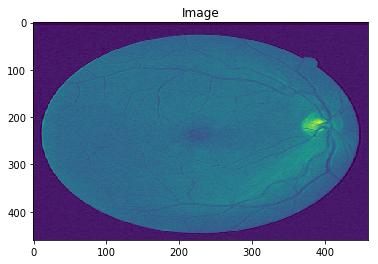

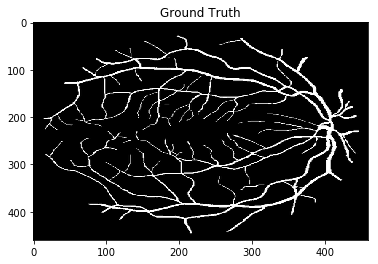

In [3]:
DATA_ROOT = "/Users/cesare.chung/int/01_CODE_UNET/NEW2/"
#
# Training
#
masks_dir = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize2/*_manual1_resized_mask.gif"))
imgs_dir  = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize2/*_training_resized_training.tif"))

# Import data
print('Loading training dataset...\n')

X_data=[]
for index,entry in enumerate(imgs_dir):
    img = misc.imread(entry)
    X_data.append(img)

Y_data=[]
for index,entry in enumerate(masks_dir):
    img = misc.imread(entry)
    Y_data.append(img)

#
X_data=np.array(X_data)
Y_data=np.array(Y_data)
#
plt.imshow(X_data[19,...,2], aspect="auto")   # X_data[i,...,j]. i = 1,..., number of samples; j = 1,2,3
plt.title("Image")
plt.show()
plt.imshow(Y_data[19,..., ], aspect="auto",cmap='gray')
plt.title("Ground Truth")
plt.show()

In [4]:
#####################
# Standardization   # X
#####################

In [5]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_data_std=[]
for i in range(0,20):
    img_std = stdsc.fit_transform(X_data[i,...,0])
    X_data_std.append(img_std)

#
X_data_std=np.array(X_data_std)
#

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
print("TRAIN data  shape (Scaled):", X_data_std.shape)

print("TRAIN data  shape:", X_data.shape)
print("TRAIN label shape:", Y_data.shape)

TRAIN data  shape (Scaled): (20, 460, 460)
TRAIN data  shape: (20, 460, 460, 3)
TRAIN label shape: (20, 460, 460)


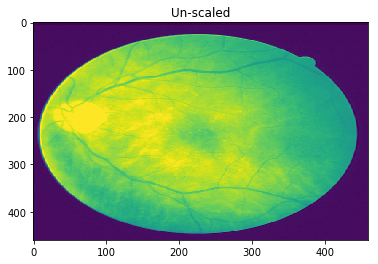

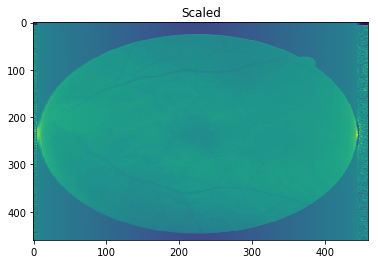

In [7]:
plt.imshow(X_data[0,...,0], aspect="auto")
plt.title("Un-scaled")
plt.show()
plt.imshow(X_data_std[0,...,], aspect="auto")
plt.title("Scaled")
plt.show()

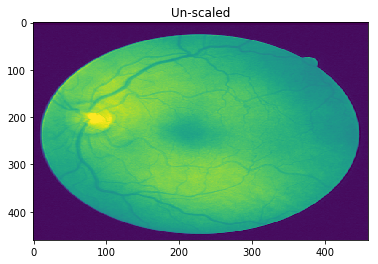

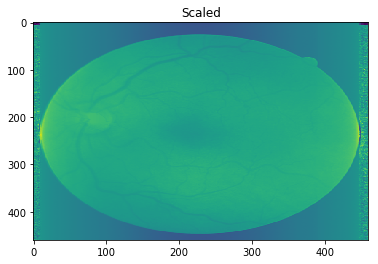

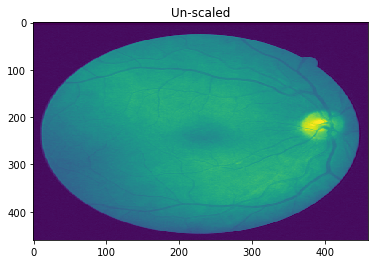

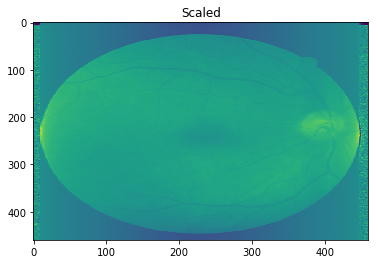

In [8]:
for i in range(18,20):
    plt.imshow(X_data[i,...,0], aspect="auto")
    plt.title("Un-scaled")
    plt.show()
    plt.imshow(X_data_std[i,...,], aspect="auto")
    plt.title("Scaled")
    plt.show()

In [9]:
#print(X_data[12])

In [10]:
print(X_data_std[12])

[[-5.69872845 -5.70445814 -5.62639384 ..., -5.44130244 -5.50028321
  -5.48182873]
 [-5.69872845 -5.70445814 -5.62639384 ..., -5.44130244 -5.50028321
  -5.48182873]
 [-5.69872845 -5.70445814 -5.62639384 ..., -5.44130244 -5.50028321
  -5.48182873]
 ..., 
 [-0.47975643 -1.18023272  0.32506616 ..., -1.29268511  0.10044789
   0.24917403]
 [-1.22532386 -1.93427029  0.32506616 ...,  0.78162356  0.80053928
   0.24917403]
 [-1.9708913  -1.18023272 -1.16279884 ..., -3.36699378 -4.10010044
  -3.3327027 ]]


In [11]:
#####################
# Testing  data     # X & Y
#####################

Loading testing dataset...



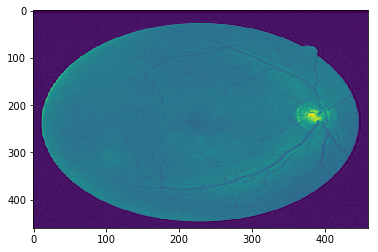

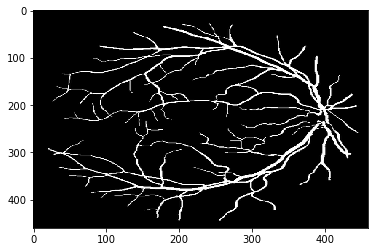

In [13]:
#
masks_Testing = sorted(glob.glob(DATA_ROOT+"/testData_tftf/resize2/*_manual1_resized_mask.gif"))
imgs_Testing  = sorted(glob.glob(DATA_ROOT+"/testData_tftf/resize2/*_test_resized_testing.tif"))

# Import data
print('Loading testing dataset...\n')

X_test=[]
for index,entry in enumerate(imgs_Testing):
    img = misc.imread(entry)
    X_test.append(img)

Y_test=[]
for index,entry in enumerate(masks_Testing):
    img = misc.imread(entry)
    Y_test.append(img)

#
X_test=np.array(X_test)
Y_test=np.array(Y_test)
#
plt.imshow(X_test[19,...,2], aspect="auto")   
plt.show()
plt.imshow(Y_test[19,..., ], aspect="auto",cmap='gray')
plt.show()

In [14]:
#####################
# Standardization   # X
#####################

In [15]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_test_std=[]
for i in range(0,20):
    img_std = stdsc.fit_transform(X_test[i,...,0])
    X_test_std.append(img_std)

#
X_test_std=np.array(X_test_std)
#

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
print("TEST data  shape (Scaled):", X_test_std.shape)

print("TEST  data  shape:", X_test.shape)
print("TEST  label shape:", Y_test.shape)

TEST data  shape (Scaled): (20, 460, 460)
TEST  data  shape: (20, 460, 460, 3)
TEST  label shape: (20, 460, 460)


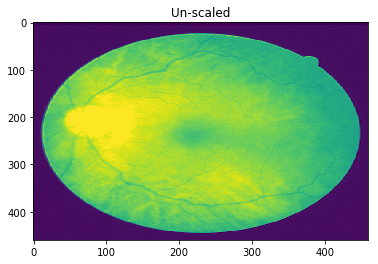

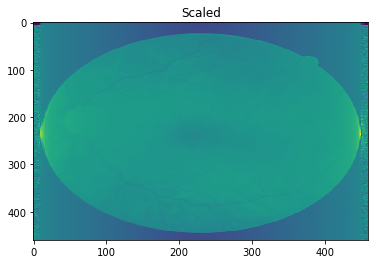

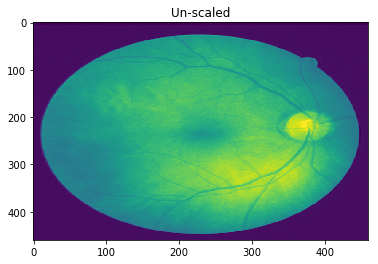

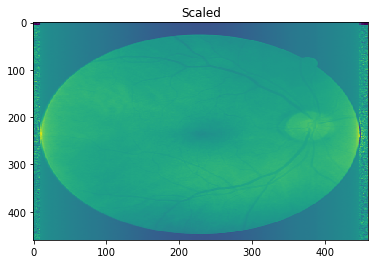

In [17]:
for i in range(8,10):
    plt.imshow(X_test[i,...,0], aspect="auto")
    plt.title("Un-scaled")
    plt.show()
    plt.imshow(X_test_std[i,...,], aspect="auto")
    plt.title("Scaled")
    plt.show()

In [18]:
for i in range(14,16):
    print(X_test_std[i])

[[-5.77260928 -5.67267646 -5.50558981 ..., -5.95782916 -5.83560634
  -5.71032783]
 [-5.77260928 -5.67267646 -5.50558981 ..., -5.95782916 -5.10216948
  -5.71032783]
 [-5.77260928 -5.67267646 -5.50558981 ..., -5.95782916 -5.83560634
  -5.71032783]
 ..., 
 [ 0.21307743  0.29173765  0.85943164 ...,  0.08539336  0.76532542
   0.17924796]
 [ 0.96128827  1.03728941  0.15220703 ...,  0.08539336  0.03188856
   0.17924796]
 [-0.53513341 -0.45381412  0.15220703 ..., -4.44702353 -4.36873262
  -4.23793388]]
[[-5.86842488 -5.85524218 -5.73560166 ..., -5.1960735  -5.36212526
  -5.39295392]
 [-5.86842488 -5.85524218 -5.73560166 ..., -5.1960735  -5.36212526
  -5.39295392]
 [-5.86842488 -5.09845336 -5.0093763  ..., -5.1960735  -5.36212526
  -5.39295392]
 ..., 
 [ 0.15215041  0.19906836  0.07420129 ..., -0.1253892  -0.1802395
  -0.69327554]
 [-0.6004215   0.19906836  0.07420129 ..., -0.1253892  -0.82797522
  -0.02189291]
 [ 1.65729423  0.19906836  0.07420129 ..., -4.56223796 -4.06665382
  -4.05018867]]


In [19]:
#print(X_test[14])

In [20]:
X_data = X_data.astype(np.float32)
Y_data = Y_data.astype(np.bool)

X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.bool)

In [21]:
X_data_std = X_data_std.astype(np.float32)

X_test_std = X_test_std.astype(np.float32)

In [22]:
#######################
# Training parameters #
#######################
training_iters = 1
epochs = 1
dropout = 0.75
display_step = 1

In [23]:
#data_provider = image_util.SimpleDataProvider(X_data_std, Y_data, channels=3, n_class=2)
data_provider = image_util.SimpleDataProvider(X_data, Y_data, channels=3, n_class=2)

In [24]:
print(data_provider.channels)
print(data_provider.n_class)

3
2


In [25]:
net = unet.Unet(channels=data_provider.channels, n_class=data_provider.n_class, layers=3, features_root=64)
trainer = unet.Trainer(net, optimizer="adam")

2017-11-20 22:37:50,039 Layers 3, features 64, filter size 3x3, pool size: 2x2


In [26]:
path = trainer.train(data_provider, "./out", training_iters=training_iters, epochs=epochs, dropout=dropout, display_step=display_step)


2017-11-20 22:37:59,418 Removing '/Users/cesare.chung/int/01_CODE_UNET/prediction'
2017-11-20 22:37:59,420 Removing '/Users/cesare.chung/int/01_CODE_UNET/out'
2017-11-20 22:37:59,425 Allocating '/Users/cesare.chung/int/01_CODE_UNET/prediction'
2017-11-20 22:37:59,426 Allocating '/Users/cesare.chung/int/01_CODE_UNET/out'
2017-11-20 22:38:54,835 Verification error= 20.2%, loss= 0.6765
2017-11-20 22:38:59,853 Start optimization
2017-11-20 22:39:41,939 Iter 0, Minibatch Loss= 0.6147, Training Accuracy= 0.7910, Minibatch error= 20.9%
2017-11-20 22:39:41,945 Epoch 0, Average loss: 0.6795, learning rate: 0.0010
2017-11-20 22:40:28,087 Verification error= 20.2%, loss= 0.6110
2017-11-20 22:40:31,746 Optimization Finished!


In [27]:
####################
# Testing result   # Un-scaled
####################

In [28]:
test_generator =image_util.SimpleDataProvider(X_test, Y_test, channels=3, n_class=2)

In [29]:
X_test, Y_test = test_generator(1)

In [30]:
prediction = net.predict("./out/model.cpkt", X_test)

INFO:tensorflow:Restoring parameters from ./out/model.cpkt


2017-11-20 22:40:48,765 Restoring parameters from ./out/model.cpkt
2017-11-20 22:40:49,106 Model restored from file: ./out/model.cpkt


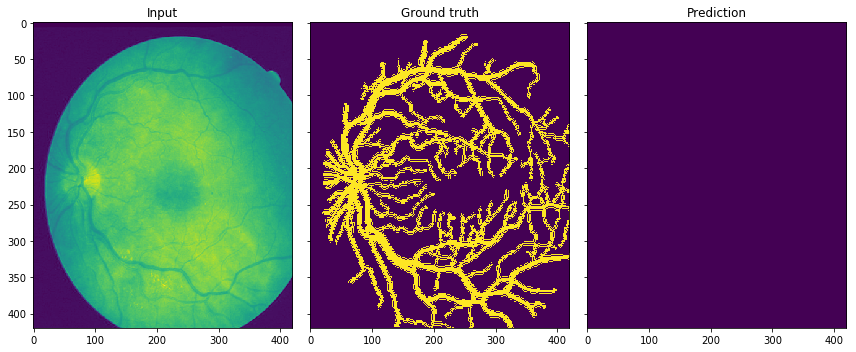

In [31]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(X_test[0,...,0], aspect="auto")
ax[1].imshow(Y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()

In [32]:
print("PREDICTION",prediction.shape)

PREDICTION (1, 420, 420, 2)


In [33]:
print("Testing error rate: {:.2f}%".format(unet.error_rate(prediction, util.crop_to_shape(Y_test, prediction.shape))))

Testing error rate: 24.23%


In [34]:
img = util.combine_img_prediction(X_test,Y_test,prediction)
util.save_image(img, "/Users/cesare.chung/int/retina_problem_Testing.png")

In [35]:
####################
# Training result  # Un-scaled
####################

In [36]:
X_test, Y_test = data_provider(1)

prediction = net.predict("./out/model.cpkt", X_test)

INFO:tensorflow:Restoring parameters from ./out/model.cpkt


2017-11-20 22:41:15,088 Restoring parameters from ./out/model.cpkt
2017-11-20 22:41:15,416 Model restored from file: ./out/model.cpkt


In [37]:
print("Training error rate: {:.2f}%".format(unet.error_rate(prediction, util.crop_to_shape(Y_test, prediction.shape))))

Training error rate: 21.84%


In [38]:
img = util.combine_img_prediction(X_test,Y_test,prediction)
util.save_image(img, "/Users/cesare.chung/int/retina_problem_Training.png")

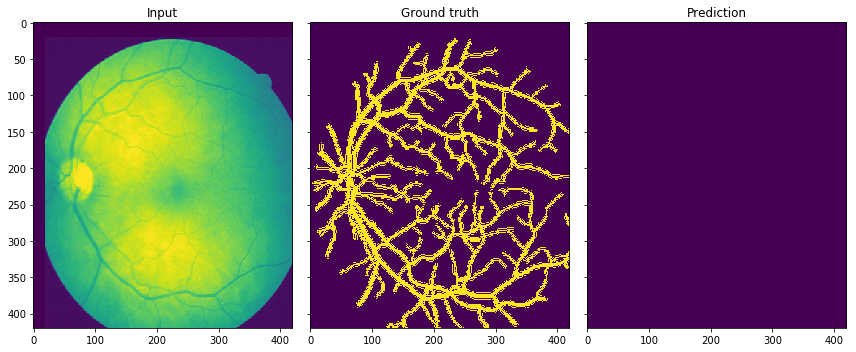

In [39]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(X_test[0,...,0], aspect="auto")
ax[1].imshow(Y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()